In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split # разбиение данных на тренировочные и тестовые

from sklearn.compose import ColumnTransformer # преобразование столбцов
from sklearn.preprocessing import OneHotEncoder # кодирование категориальных переменных
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import StandardScaler # нормализация и масштабирование данных

from sklearn.linear_model import LogisticRegression # логистическая регрессия
from sklearn.neighbors import KNeighborsClassifier # k-ближайших новых соседей
from sklearn.svm import SVC # SVM для классификации
from sklearn.naive_bayes import GaussianNB # Naive bayes
from sklearn.tree import DecisionTreeClassifier, export_graphviz # Дерево Решений
from sklearn.ensemble import RandomForestClassifier  # Random Forest


from sklearn.tree import plot_tree # отрисовка дерева

from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

from sklearn.experimental import enable_halving_search_cv 
from sklearn.model_selection import cross_val_score # кроссвалидация
from sklearn.model_selection import GridSearchCV, HalvingGridSearchCV # подбор гиперпараметров с кроссвалидацией

import warnings
warnings.filterwarnings('ignore')

c:\Users\sobak\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## ДЗ №1 <a name='dz1'></a>

Классификация людей с помощью демографических данных для прогнозирования, зарабатывает ли человек более \$ 50 000 в год.

Описание признаков:

**Age** – возраст, количественный признак  
**Workclass** – тип работодателя, количественный признак  
**fnlwgt** – итоговый вес обьекта, количественный признак    
**Education** – уровень образования, качественный признак  
**Education_Num** – количество лет обучения, количественный признак  
**Martial_Status** – семейное положение, категориальный признак  
**Occupation** – профессия, категориальный признак  
**Relationship** – тип семейных отношений, категориальный признак    
**Race** – раса, категориальный признак  
**Sex** – пол, качественный признак  
**Capital_Gain** – прирост капитала, количественный признак  
**Capital_Loss** – потери капитала, количественный признак  
**Hours_per_week** – количество часов работы в неделю, количественный признак  
**Country** – страна, категориальный признак  
   
Целевая переменная: **Target** – уровень заработка, категориальный (бинарный) признак

1. Выполнить разведочный анализ данных, заполнить пропуски, преобразовать категориальные данные в числовые:
    - Кодируем категориальные признаки 'Workclass', 'Education', 'Martial_Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Country'. Это можно сделать с помощью метода pandas get_dummies.
    
2. В тестовой выборке не оказалось Голландии. Завести необходимый признак из нулей.

3. Обучить LogisticRegression(). Использовать в качестве baseline.
4. Обучить k-NN, SVC, Naive Bayes, DecisionTree, RandomForest
5. Обучить SVC с такими параметрами {'classifier__gamma':[0.001, 0.01, 0.1, 1, 10, 100], 'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]}
6. Обучить DecisionTreeClassifier c параметрами tree_params = {'max_depth': range(2,11)}
7. Обучить RandomForestClassifier c параметрами forest_params = {'max_depth': range(10, 21), 'max_features': range(5, 105, 10)}
8. Использовать кроссвалидацию и GridSearchCV.
9. Сравнить все модели с baseline
10. Вывести confusion matrix


In [2]:
categorical_columns = ['Workclass', 'Education', 'Martial_Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Country']

In [3]:
data_train = pd.read_csv('adult_train.csv', sep=';')
data_train

,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
data_test = pd.read_csv('adult_test.csv', sep=';')
data_test

,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
0,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
1,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
2,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
3,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
4,18,NaN,103497.0,Some-college,10.0,Never-married,NaN,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419.0,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K.
16277,64,NaN,321403.0,HS-grad,9.0,Widowed,NaN,Other-relative,Black,Male,0.0,0.0,40.0,United-States,<=50K.
16278,38,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
16279,44,Private,83891.0,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K.


In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education_Num   32561 non-null  int64 
 5   Martial_Status  32561 non-null  object
 6   Occupation      30718 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Sex             32561 non-null  object
 10  Capital_Gain    32561 non-null  int64 
 11  Capital_Loss    32561 non-null  int64 
 12  Hours_per_week  32561 non-null  int64 
 13  Country         31978 non-null  object
 14  Target          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
data_train.isnull().sum()

Age                  0
Workclass         1836
fnlwgt               0
Education            0
Education_Num        0
Martial_Status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_Gain         0
Capital_Loss         0
Hours_per_week       0
Country            583
Target               0
dtype: int64

In [7]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             16281 non-null  int64  
 1   Workclass       15318 non-null  object 
 2   fnlwgt          16281 non-null  float64
 3   Education       16281 non-null  object 
 4   Education_Num   16281 non-null  float64
 5   Martial_Status  16281 non-null  object 
 6   Occupation      15315 non-null  object 
 7   Relationship    16281 non-null  object 
 8   Race            16281 non-null  object 
 9   Sex             16281 non-null  object 
 10  Capital_Gain    16281 non-null  float64
 11  Capital_Loss    16281 non-null  float64
 12  Hours_per_week  16281 non-null  float64
 13  Country         16007 non-null  object 
 14  Target          16281 non-null  object 
dtypes: float64(5), int64(1), object(9)
memory usage: 1.9+ MB


In [8]:
data_test.isnull().sum()

Age                 0
Workclass         963
fnlwgt              0
Education           0
Education_Num       0
Martial_Status      0
Occupation        966
Relationship        0
Race                0
Sex                 0
Capital_Gain        0
Capital_Loss        0
Hours_per_week      0
Country           274
Target              0
dtype: int64

In [9]:
columns_null_train = data_train.columns[data_train.isna().any()].tolist()
for column in columns_null_train:
  mode_value = data_train[column].mode()[0]
  data_train[column].fillna(mode_value, inplace=True)
  
columns_null_test = data_test.columns[data_test.isna().any()].tolist()
for column in columns_null_test:
  mode_value = data_test[column].mode()[0]
  data_test[column].fillna(mode_value, inplace=True)

In [10]:
data_train.describe()

,Age,fnlwgt,Education_Num,Capital_Gain,Capital_Loss,Hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [11]:
data_test.describe()

,Age,fnlwgt,Education_Num,Capital_Gain,Capital_Loss,Hours_per_week
count,16281.000000,1.628100e+04,16281.000000,16281.000000,16281.000000,16281.000000
mean,38.767459,1.894357e+05,10.072907,1081.905104,87.899269,40.392236
std,13.849187,1.057149e+05,2.567545,7583.935968,403.105286,12.479332
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.167360e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.778310e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.383840e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,3770.000000,99.000000


In [12]:
data_train = pd.get_dummies(data=data_train, columns=categorical_columns)
data_test = pd.get_dummies(data=data_test, columns=categorical_columns)
print(data_train.info())
print(data_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Columns: 106 entries, Age to Country_ Yugoslavia
dtypes: int64(6), object(1), uint8(99)
memory usage: 4.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Columns: 105 entries, Age to Country_ Yugoslavia
dtypes: float64(5), int64(1), object(1), uint8(98)
memory usage: 2.4+ MB
None


In [13]:
set(list(data_train.columns)) - set(list(data_test.columns))

{'Country_ Holand-Netherlands'}

In [14]:
data_test['Country_ Holand-Netherlands'] = 0
set(list(data_train.columns)) - set(list(data_test.columns))

set()

In [15]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data_train['Target'] = labelencoder.fit_transform(data_train['Target'])
data_test['Target'] = labelencoder.fit_transform(data_test['Target'])


In [16]:
X_train = data_train.loc[:, data_train.columns != 'Target']
y_train = data_train['Target']
X_test = data_test.loc[:, data_test.columns != 'Target']
y_test = data_test['Target']

In [17]:
def print_stats(model):
    model_score_train = model.score(X_train, y_train)
    model_score_test = model.score(X_test, y_test)
    print(f'Train score: {model_score_train}')
    print(f'Test score: {model_score_test}')
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=model.classes_)
    disp.plot()
    plt.show()

Train score: 0.7957679432449863
Test score: 0.7978011178674529


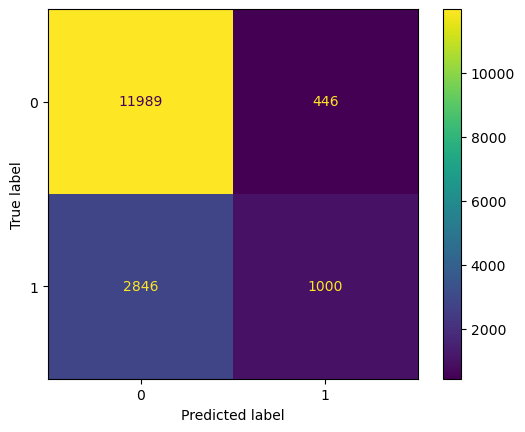

In [18]:
logReg = LogisticRegression()
logReg.fit(X_train, y_train)
print_stats(logReg)

Train score: 0.8356930069715304
Test score: 0.7769793010257355


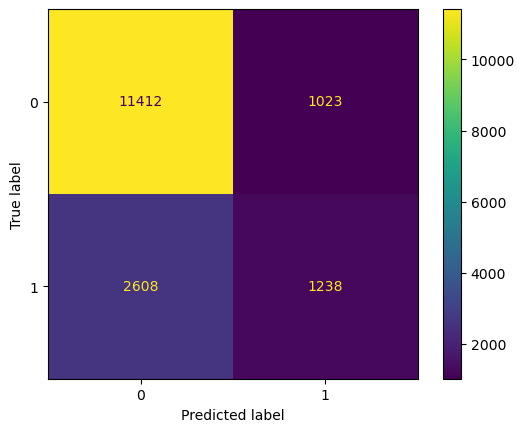

In [19]:
knnClass = KNeighborsClassifier()
knnClass.fit(X_train, y_train)
print_stats(knnClass)

n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 5
min_resources_: 401
max_resources_: 32561
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 180
n_resources: 401
Fitting 3 folds for each of 180 candidates, totalling 540 fits
----------
iter: 1
n_candidates: 60
n_resources: 1203
Fitting 3 folds for each of 60 candidates, totalling 180 fits
----------
iter: 2
n_candidates: 20
n_resources: 3609
Fitting 3 folds for each of 20 candidates, totalling 60 fits
----------
iter: 3
n_candidates: 7
n_resources: 10827
Fitting 3 folds for each of 7 candidates, totalling 21 fits
----------
iter: 4
n_candidates: 3
n_resources: 32481
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Best Accuracy: 74.99 %
Best Parameters: {'C': 0.001, 'gamma': 0.01, 'max_iter': 1000}
Train score: 0.7893799330487393
Test score: 0.7555432712978318


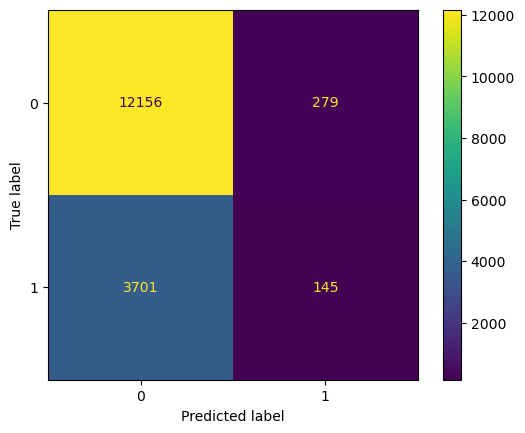

In [20]:
parameters = {'gamma':[0.001, 0.01, 0.1, 1, 10, 100], 'C': [0.001, 0.01, 0.1, 1, 10, 100],'max_iter':[50, 100, 200, 500, 1000]}
svcGs = HalvingGridSearchCV(SVC(),
                           param_grid = parameters,
                           cv = 3,
                           n_jobs = -1, verbose=2)
svcGs.fit(X_train, y_train)
best_accuracy = svcGs.best_score_
best_parameters = svcGs.best_params_
svc_best = svcGs.best_estimator_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)
# svc_model = SVC();
# svc_model.fit(X_train, y_train)
print_stats(svc_best)

Train score: 0.7950922883203833
Test score: 0.7957742153430379


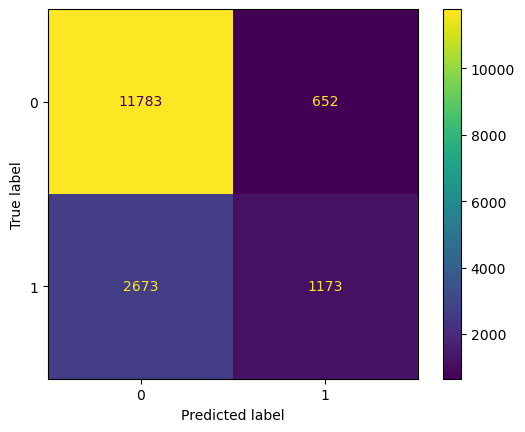

In [21]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
print_stats(naive_bayes)

n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 3617
max_resources_: 32561
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 9
n_resources: 3617
Fitting 5 folds for each of 9 candidates, totalling 45 fits
----------
iter: 1
n_candidates: 3
n_resources: 10851
Fitting 5 folds for each of 3 candidates, totalling 15 fits
----------
iter: 2
n_candidates: 1
n_resources: 32553
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best Accuracy: 85.30 %
Best Parameters: {'max_depth': 6}
Train score: 0.8569454255090445
Test score: 0.8572569252502917


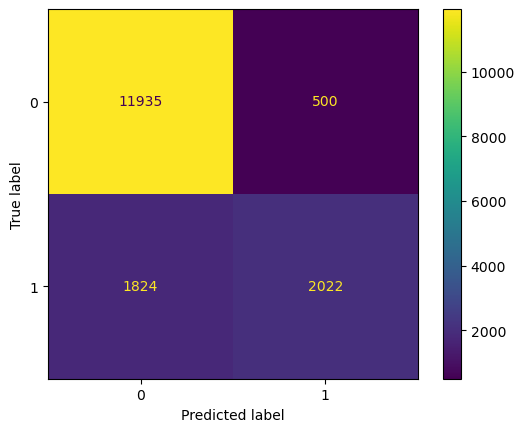

In [22]:
parameters = {'max_depth': range(2, 11)}
forestGs = HalvingGridSearchCV(DecisionTreeClassifier(),
                           param_grid = parameters,
                           cv = 5,
                           n_jobs = -1, verbose=2)
forestGs.fit(X_train, y_train)
best_accuracy = forestGs.best_score_
best_parameters = forestGs.best_params_
forest_best = forestGs.best_estimator_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)
print_stats(forest_best)

n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 4
min_resources_: 1205
max_resources_: 32561
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 30
n_resources: 1205
Fitting 5 folds for each of 30 candidates, totalling 150 fits
----------
iter: 1
n_candidates: 10
n_resources: 3615
Fitting 5 folds for each of 10 candidates, totalling 50 fits
----------
iter: 2
n_candidates: 4
n_resources: 10845
Fitting 5 folds for each of 4 candidates, totalling 20 fits
----------
iter: 3
n_candidates: 2
n_resources: 32535
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best Accuracy: 86.08 %
Best Parameters: {'max_depth': 10, 'max_features': 45}
Train score: 0.8734068363993734
Test score: 0.8635218966893925


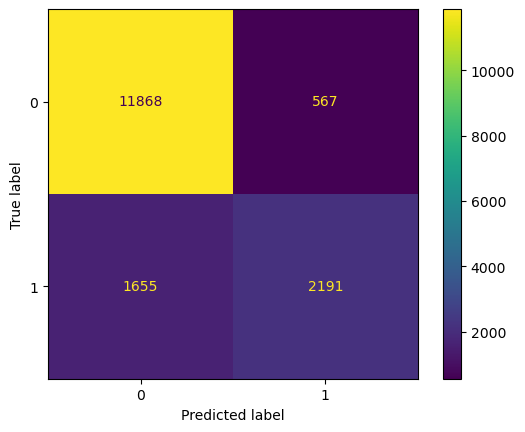

In [23]:
parameters = {'max_depth': range(10, 21, 2),'max_features': range(5, 105, 20)}
forestGs = HalvingGridSearchCV(RandomForestClassifier(),
                           param_grid = parameters,
                           cv = 5,
                           n_jobs = -1, verbose=2)
forestGs.fit(X_train, y_train)
best_accuracy = forestGs.best_score_
best_parameters = forestGs.best_params_
forest_best = forestGs.best_estimator_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)
print_stats(forest_best)

Лучшая модель на тестовых данных - RandomForestClassifier

## ДЗ №2 <a name='dz2'></a>

1. Разбить датасет digits на обучающую и тестовую выборку, 85% и 15% соответственно.
2. Найти лучший классификатор (и лучшие параметры) для этого набора данных.
3. Вывести матрицу несоответствия

In [25]:
from sklearn.datasets import load_digits
digits = load_digits()

X = digits.data
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

Train score: 0.9973804846103471
Test score: 0.9629629629629629


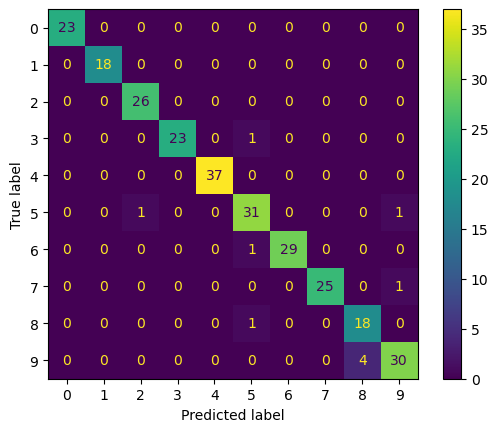

In [27]:
logReg = LogisticRegression(multi_class='ovr')
logReg.fit(X_train, y_train)
print_stats(logReg)

Train score: 0.9908316961362148
Test score: 0.9888888888888889


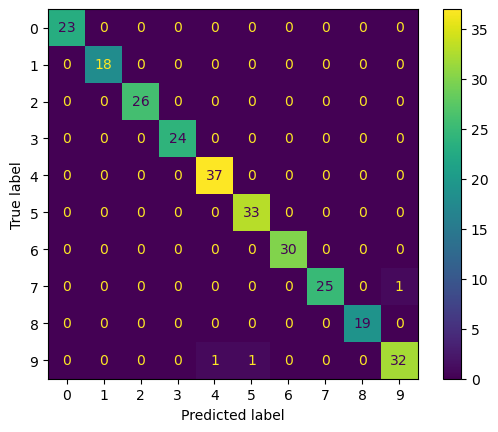

In [28]:
knnClass = KNeighborsClassifier()
knnClass.fit(X_train, y_train)
print_stats(knnClass)

n_iterations: 3
n_required_iterations: 5
n_possible_iterations: 3
min_resources_: 60
max_resources_: 1527
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 180
n_resources: 60
Fitting 3 folds for each of 180 candidates, totalling 540 fits
----------
iter: 1
n_candidates: 60
n_resources: 180
Fitting 3 folds for each of 60 candidates, totalling 180 fits
----------
iter: 2
n_candidates: 20
n_resources: 540
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Accuracy: 97.41 %
Best Parameters: {'C': 1, 'gamma': 0.001, 'max_iter': 50}
Train score: 0.9980353634577603
Test score: 0.9888888888888889


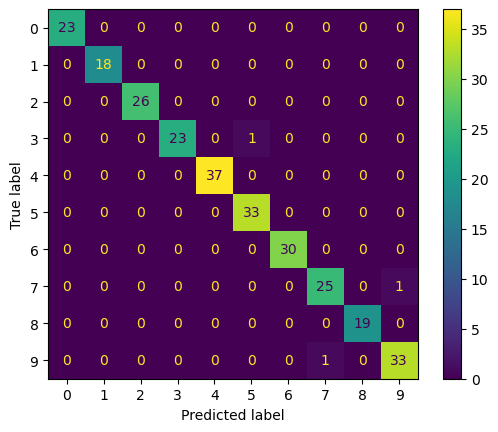

In [29]:
parameters = {'gamma':[0.001, 0.01, 0.1, 1, 10, 100], 'C': [0.001, 0.01, 0.1, 1, 10, 100],'max_iter':[50, 100, 200, 500, 1000]}
svcGs = HalvingGridSearchCV(SVC(),
                           param_grid = parameters,
                           cv = 3,
                           n_jobs = -1, verbose=2)
svcGs.fit(X_train, y_train)
best_accuracy = svcGs.best_score_
best_parameters = svcGs.best_params_
svc_best = svcGs.best_estimator_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)
print_stats(svc_best)

Train score: 0.8546168958742633
Test score: 0.8444444444444444


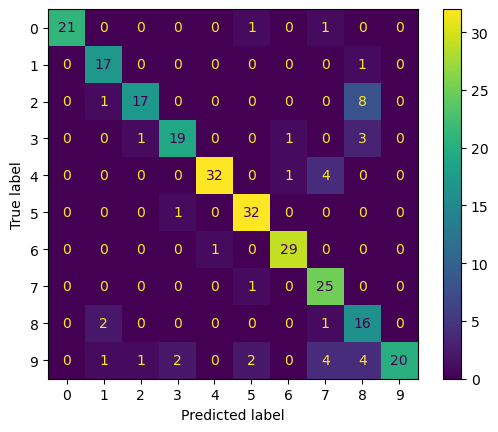

In [30]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
print_stats(naive_bayes)

n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 169
max_resources_: 1527
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 9
n_resources: 169
Fitting 5 folds for each of 9 candidates, totalling 45 fits
----------
iter: 1
n_candidates: 3
n_resources: 507
Fitting 5 folds for each of 3 candidates, totalling 15 fits
----------
iter: 2
n_candidates: 1
n_resources: 1521
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best Accuracy: 84.05 %
Best Parameters: {'max_depth': 10}
Train score: 0.9803536345776032
Test score: 0.8592592592592593


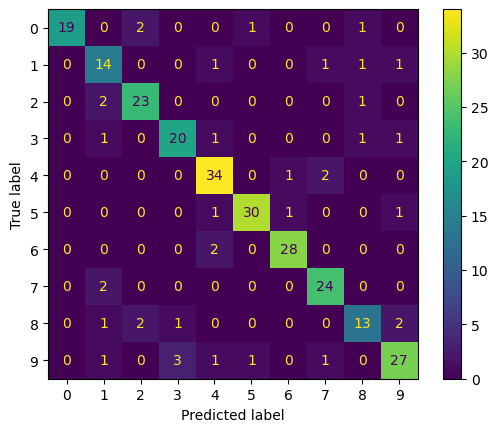

In [31]:
parameters = {'max_depth': range(2, 11)}
forestGs = HalvingGridSearchCV(DecisionTreeClassifier(),
                           param_grid = parameters,
                           cv = 5,
                           n_jobs = -1, verbose=2)
forestGs.fit(X_train, y_train)
best_accuracy = forestGs.best_score_
best_parameters = forestGs.best_params_
forest_best = forestGs.best_estimator_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)
print_stats(forest_best)

n_iterations: 3
n_required_iterations: 4
n_possible_iterations: 3
min_resources_: 100
max_resources_: 1527
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 55
n_resources: 100
Fitting 5 folds for each of 55 candidates, totalling 275 fits
----------
iter: 1
n_candidates: 19
n_resources: 300
Fitting 5 folds for each of 19 candidates, totalling 95 fits
----------
iter: 2
n_candidates: 7
n_resources: 900
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best Accuracy: 96.32 %
Best Parameters: {'max_depth': 18, 'max_features': 5}
Train score: 1.0
Test score: 0.9740740740740741


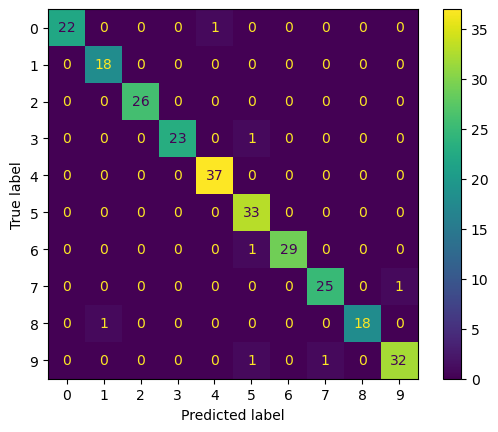

In [35]:
parameters = {'max_depth': range(10, 21),'max_features': range(5, 55, 10)}
forestGs = HalvingGridSearchCV(RandomForestClassifier(),
                           param_grid = parameters,
                           cv = 5,
                           n_jobs = -1, verbose=2)
forestGs.fit(X_train, y_train)
best_accuracy = forestGs.best_score_
best_parameters = forestGs.best_params_
forest_best = forestGs.best_estimator_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)
print_stats(forest_best)

Лучшие модели на тестовых данных - KNN and SVC